<a href="https://colab.research.google.com/github/Akashraj071/Email-Campaign-Effectivness/blob/main/ML_Classification_email_campaign_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  EMAIL CAMPAIGN EFFECTIVENESS PREDICTION



##### **Project Type**    -Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Akash Raj N
##### **Team Member 2 -** Sarath Lonappan


# **Project Summary -**

The project is to predict the email sent is read,acknowledged or ignored based on various parameters.There were many missing data which was replaced with appropriate methods.From the plots, email campaign type 1 was read more compared to other.Also the email sent during the evening time was read more likely.The data was imbalanced and had to implement SMOTE to balance the data.

Various models were built using the smote data and XGBoost performed the best.SVM was implemented but it keeps on running endlessly.This may be due the surplus of training data.So we have avoided modelling using SVM.

# **GitHub Link -**

https://github.com/Akashraj071/Email-Campaign-Effectivness

# **Problem Statement**


Most of the small to medium business owners are making effective use of the email marketing strategies for offline targeting of converting the prospective customers to leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mails that acknowledged,ignored or read.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Installing eli5 for explaining model
!pip install eli5

In [ ]:
# Import Libraries
# Standard Libraries import for data handling and manipulation of dataset
import numpy as np
import pandas as pd


#For visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt


#For normalization of columns in dataset
from sklearn.preprocessing import MinMaxScaler

#For splitting our data for model training and testing
from sklearn.model_selection import train_test_split

#For model creation and statistical calculation
import scipy.stats as stats


from statsmodels.stats.outliers_influence import variance_inflation_factor



# Models for non linear Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

#For model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,roc_curve


#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import eli5 as eli



%matplotlib inline



### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Load Dataset
file_path='/content/drive/MyDrive/Capstone Project/Classification/Email Campaign Effectiveness/Data/data_email_campaign.csv'
df1=pd.read_csv(file_path)



### Dataset First View

In [ ]:
# Dataset First Look
df1.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df1.shape

(68353, 12)

### Dataset Information

In [ ]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df1[df1.duplicated()].count()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
df1[df1.isna()].count()


Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

<Axes: >

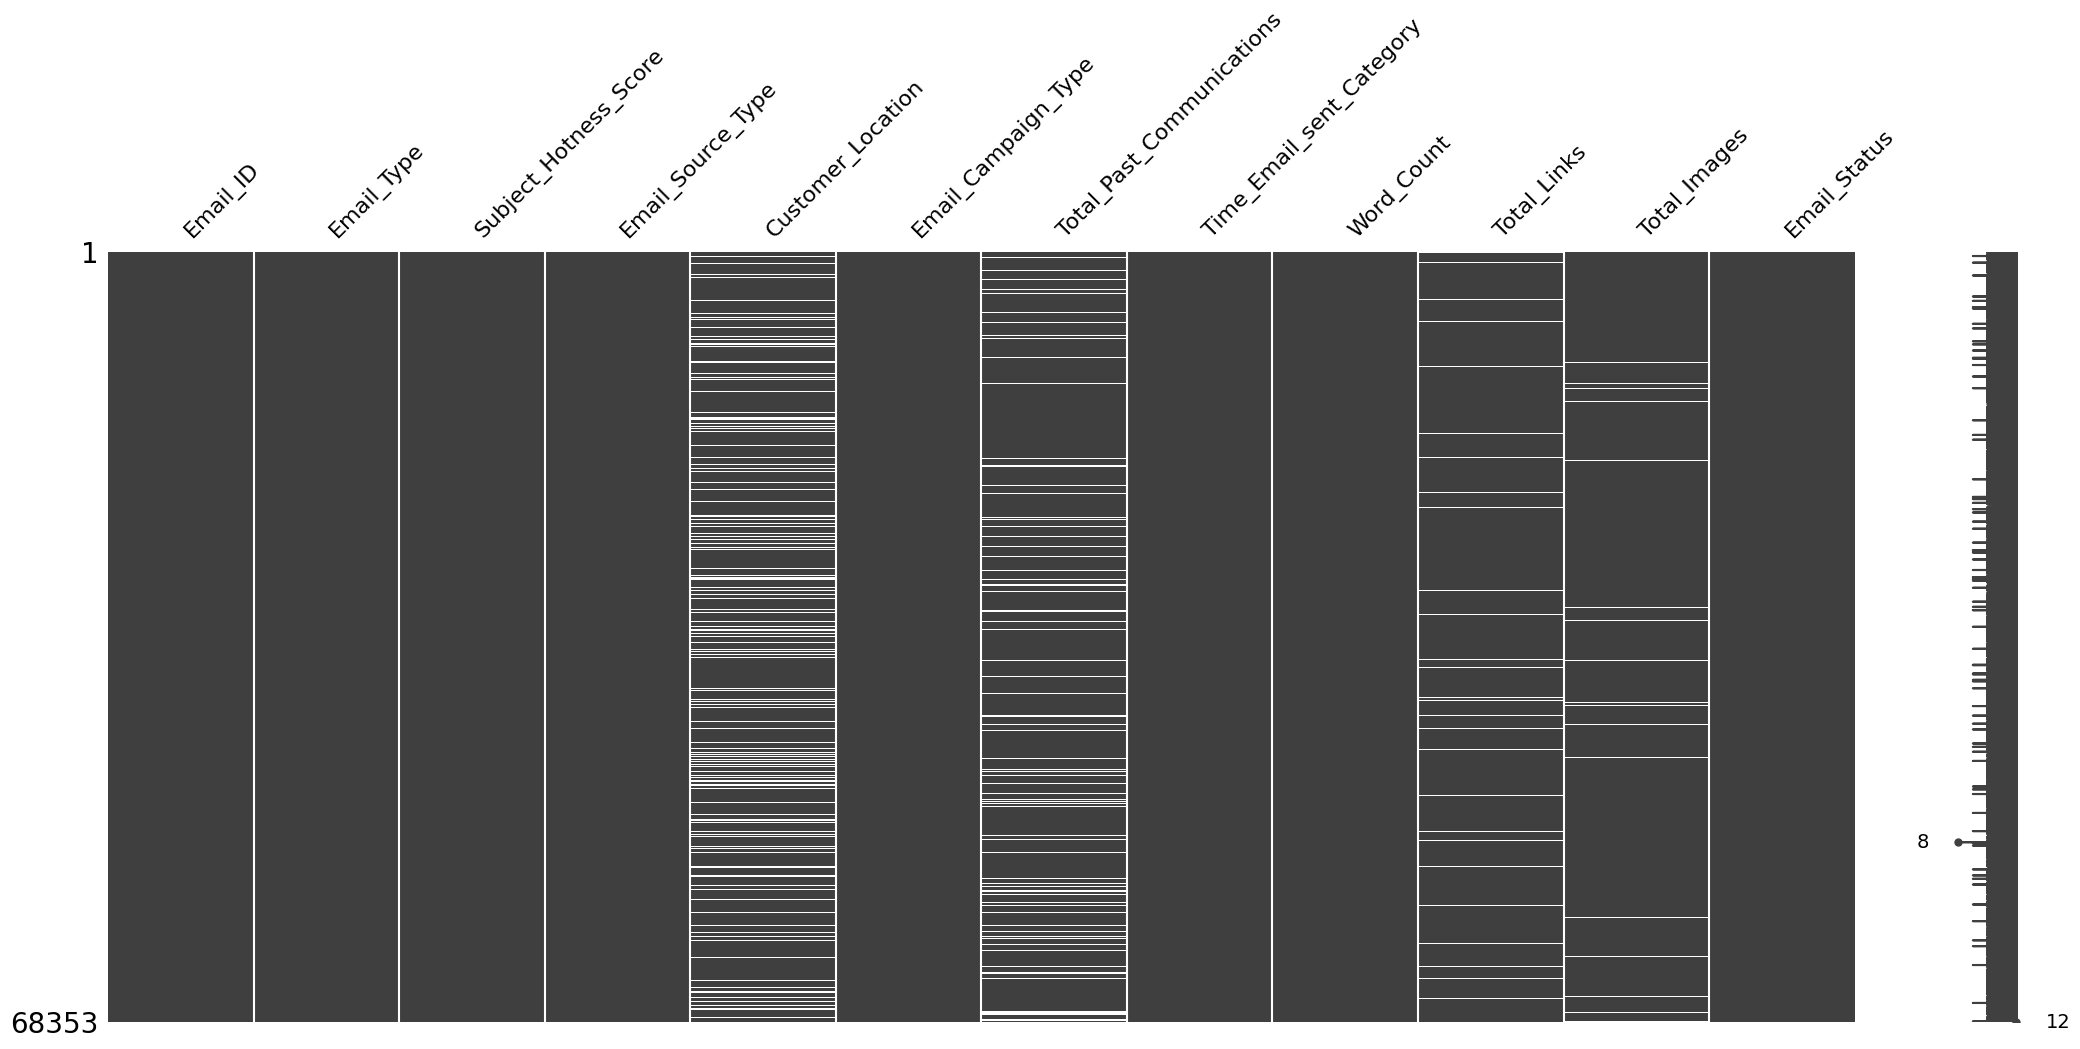

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df1)

### What did you know about your dataset?

Dataset contains 68353 rows & 12 columns.

Among 12 column,customer location and email id are categorical values while rest of the column have numerical value.

Dataset has no Null/Duplicate values.

Email status column is dependent variable while rest are independent variable.

'Customer_Location',  'Total_Past_Communications',
        'Total_Links', 'Total_Images' have missing values.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df1.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
df1.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description

Email_ID - This column contains the email ids of individuals.

Email_type - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.

Subject_Hotness_Score - It is the subject-line effectiveness score.

Email_Source - It represents the source of the email like sales,marketing or product type email.

Email_Campaign_Type - Campaign type

Total_Past_Communications - This column contains the previous mails from the source.

Customer_Location - Categorical data which explains the different demographic location of the customers.

Time_Email_sent_Category - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.

Word_Count - It contains the no.of words in the mail.

Total_Links - Total links in the email body.

Total_Images - The banner images in the email body.

Email_Status - It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# and printing those columns which have less than 25 values
for i in df1.columns:
  print(f"Unique {i}'s count:{df1[i].nunique()}")
  if i in df1.columns:
    if(df1[i].nunique() < 25):
      print(f"{df1[i].unique()}\n")

Unique Email_ID's count:68353
Unique Email_Type's count:2
[1 2]

Unique Subject_Hotness_Score's count:51
Unique Email_Source_Type's count:2
[2 1]

Unique Customer_Location's count:7
['E' nan 'B' 'C' 'G' 'D' 'F' 'A']

Unique Email_Campaign_Type's count:3
[2 3 1]

Unique Total_Past_Communications's count:64
Unique Time_Email_sent_Category's count:3
[1 2 3]

Unique Word_Count's count:151
Unique Total_Links's count:37
Unique Total_Images's count:45
Unique Email_Status's count:3
[0 1 2]



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Missing Value Count Function
def show_missing():
    missing = df1.columns[df1.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df1[show_missing()].isnull().sum().sort_values(ascending = False))



Missing Data Count
Customer_Location            11595
Total_Past_Communications     6825
Total_Links                   2201
Total_Images                  1677
dtype: int64


<ipython-input-16-74b9a88429f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.Total_Past_Communications.dropna())


<Axes: xlabel='Total_Past_Communications', ylabel='Density'>

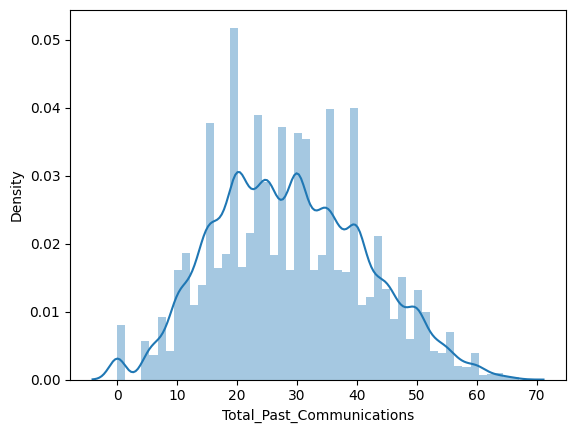

In [ ]:
sns.distplot(df1.Total_Past_Communications.dropna())

### What all manipulations have you done and insights you found?

We can replace missing values with mean as it is almost a normal distribution

In [ ]:
df1['Total_Past_Communications'] = df1['Total_Past_Communications'].fillna(df1['Total_Past_Communications'].mean())
print('Total_Past_Communications Missing After:', df1['Total_Past_Communications'].isnull().sum())

Total_Past_Communications Missing After: 0


<ipython-input-18-dc4398859311>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.Total_Links.dropna())


<Axes: xlabel='Total_Links', ylabel='Density'>

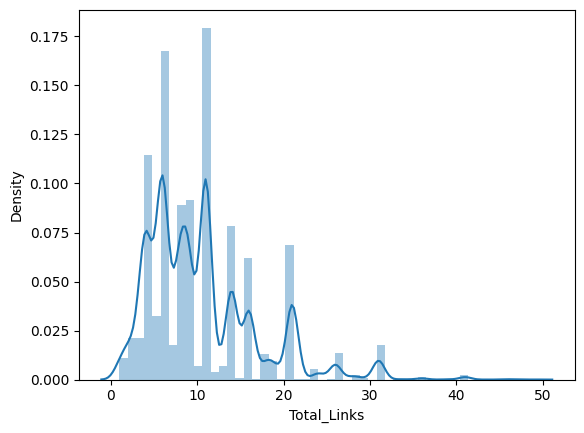

In [ ]:
sns.distplot(df1.Total_Links.dropna())

In [ ]:
#Almost positively skewed.
#So replacing it with median
df1['Total_Links'] = df1['Total_Links'].fillna(df1['Total_Links'].median())
print('Total_Links Missing After:', df1['Total_Links'].isnull().sum())


Total_Links Missing After: 0


<ipython-input-20-c7af3c949164>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.Total_Images.dropna())


<Axes: xlabel='Total_Images', ylabel='Density'>

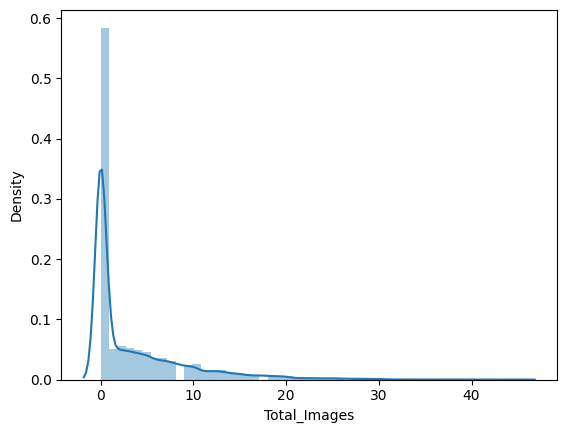

In [ ]:
sns.distplot(df1.Total_Images.dropna())

In [ ]:
#Almost positively skewed.
#So replacing it with median
df1['Total_Images'] = df1['Total_Images'].fillna(df1['Total_Images'].median())
print('Total_Images Missing After:', df1['Total_Images'].isnull().sum())


Total_Images Missing After: 0


In [ ]:
df1['Customer_Location'] = df1['Customer_Location'].fillna(df1['Customer_Location'].mode()[0])
print('Customer_Location Missing After:', df1['Customer_Location'].isnull().sum())

Customer_Location Missing After: 0


 Categorical Encoding

In [ ]:
df=df1.copy()
card_encoding={'Customer_Location':{'A':0,'B':1,'C':2,"D":3,'E':4,'F':5,'G':6}}
df=df1.replace(card_encoding)

<Axes: >

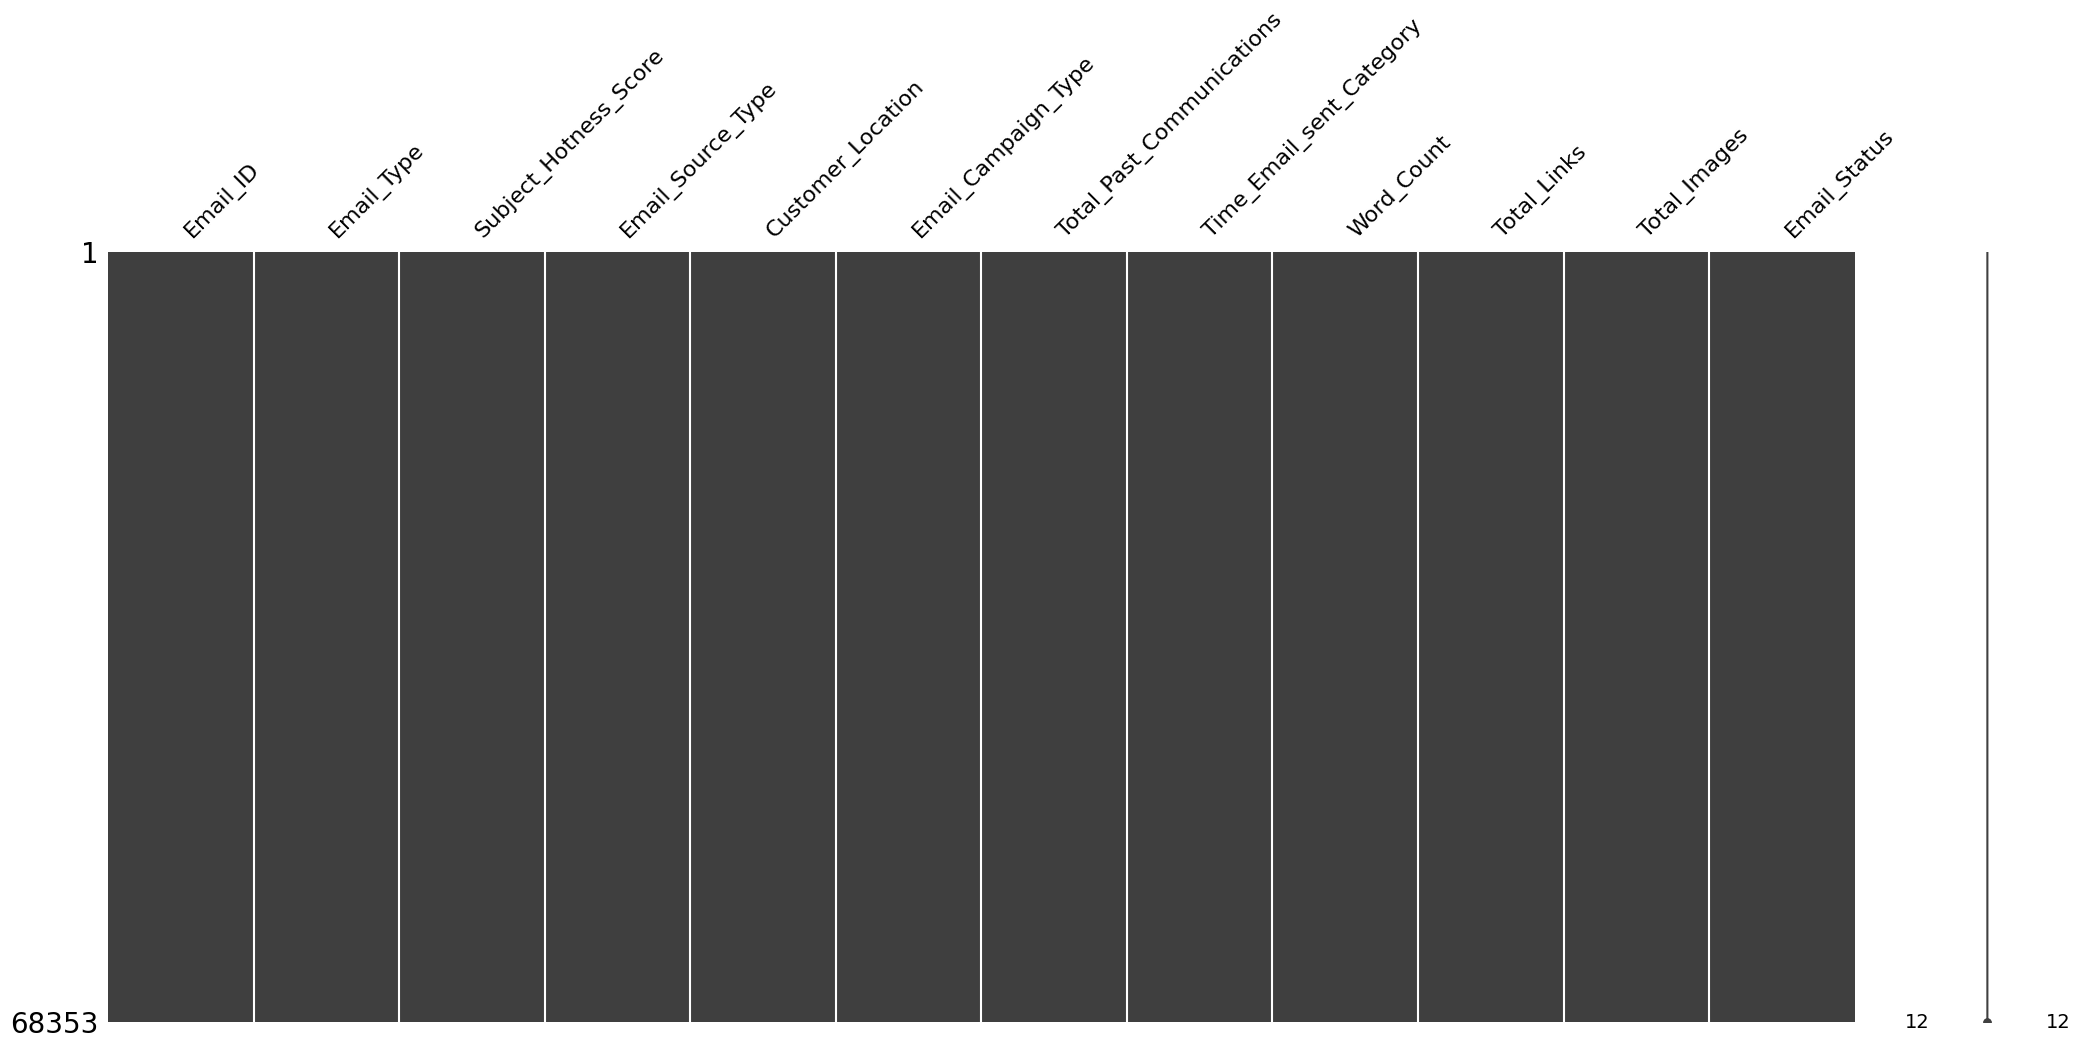

In [ ]:
msno.matrix(df1)

In [ ]:
df=df.drop('Email_ID',axis=1)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])


    bars = ax.patches

    for ind in range(numX):
      hueBars=bars[ind:][::numX]

        ## 2. Get the total height (for percentages)
      total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
      for bar in hueBars:
         ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")




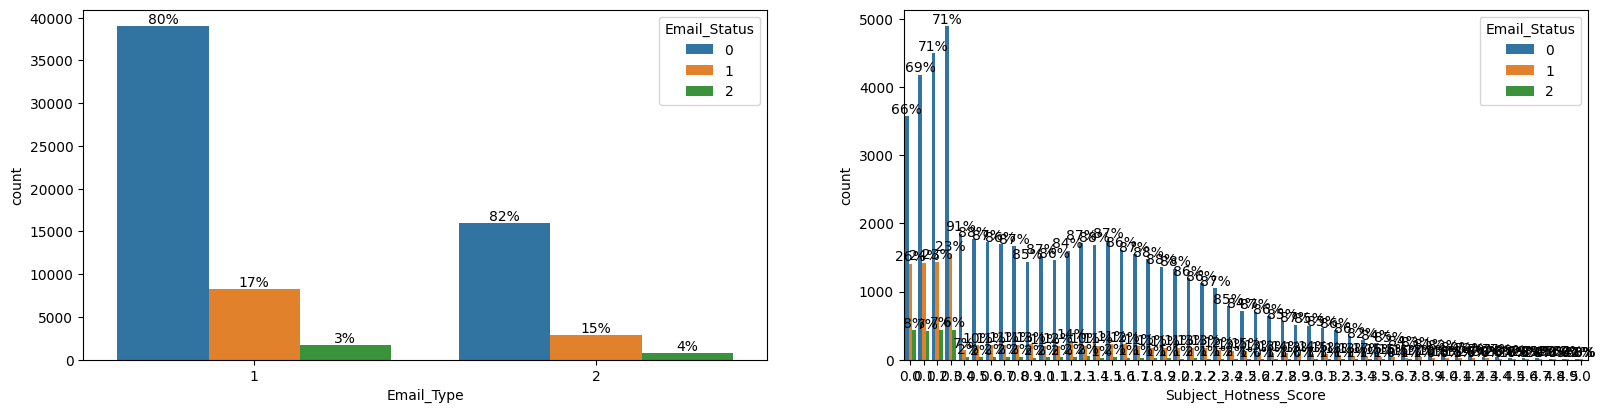

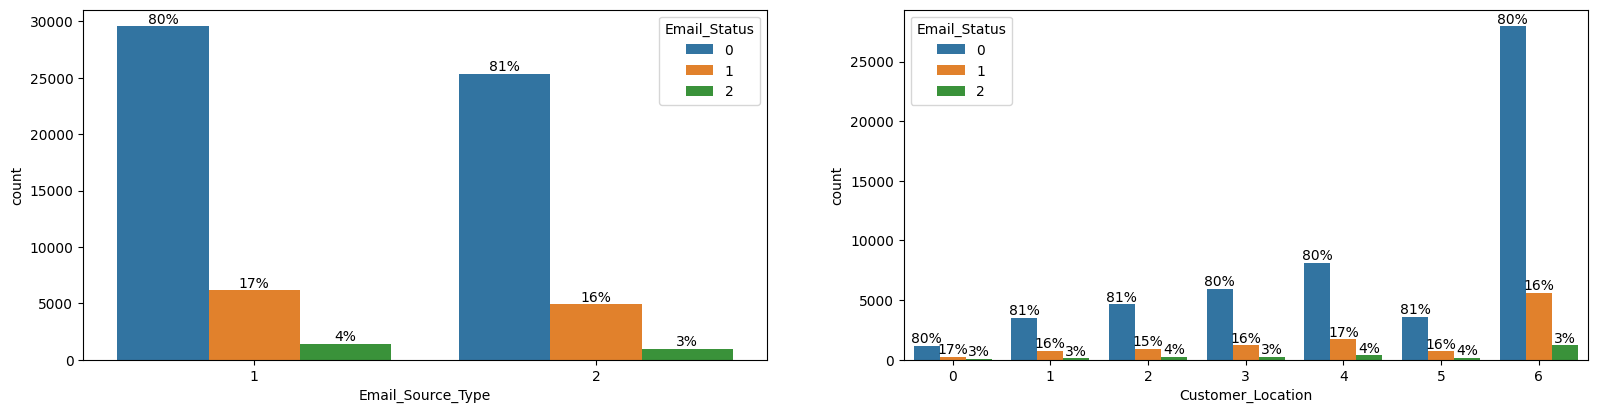

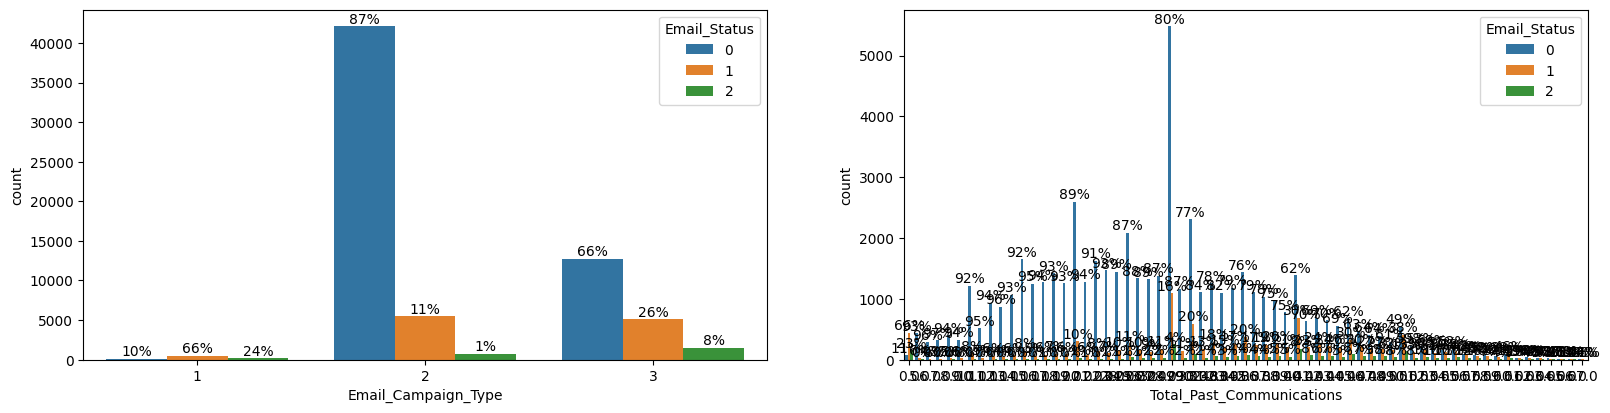

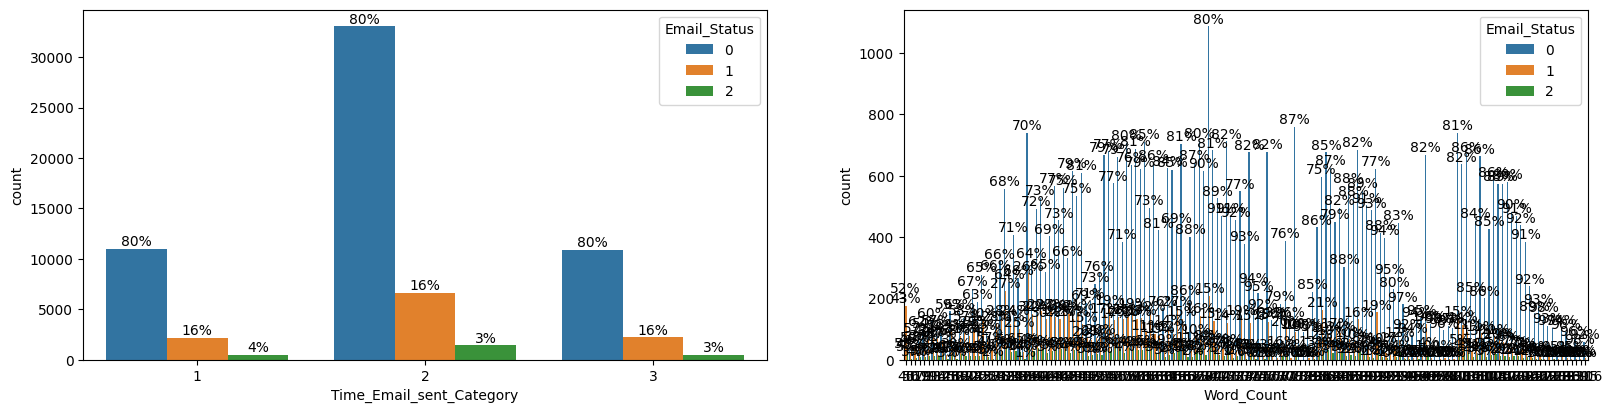

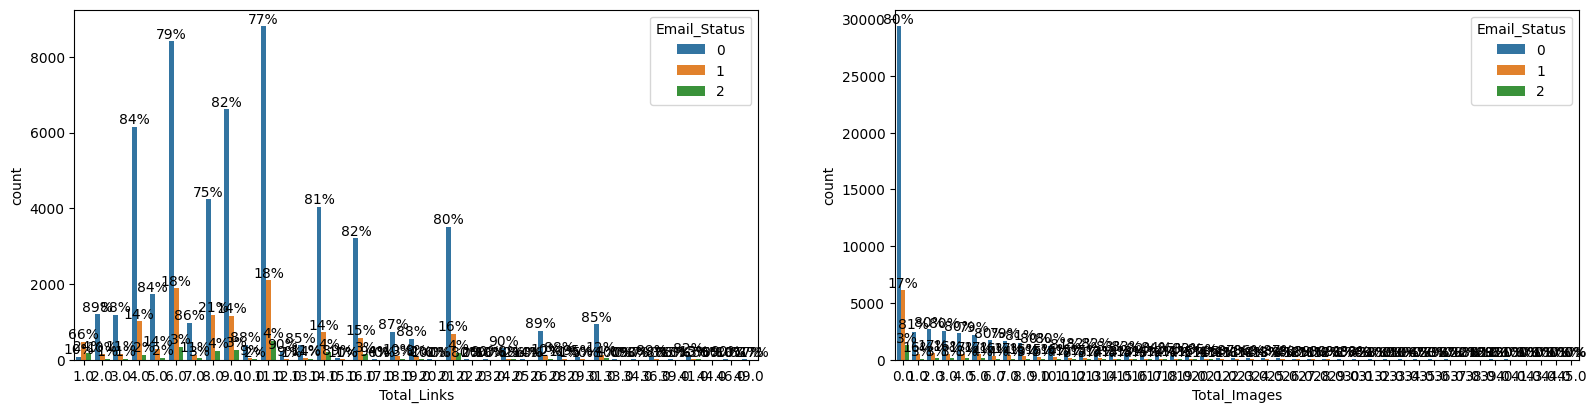

<Figure size 3000x1000 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (30,10))
for c in list(df.columns):
    if ix < 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = df, x=c,hue='Email_Status' ,ax = ax1)
            barPerc(df,c,ax1)
    ix = ix +1
    if ix == 3:
        fig = plt.figure(figsize = (30,10))
        ix =1

##### 1. Why did you pick the specific chart?

To know the influence of each variable on the dependent variable

##### 2. What is/are the insight(s) found from the chart?

Email Campaign type 1 has more probability to be read.
Email sent in the evening session are more likely to be read.
Customer Location G has highest number of email read count.

Word count should not be too low or high.
Mails are not read if the images nd links are increased.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 2

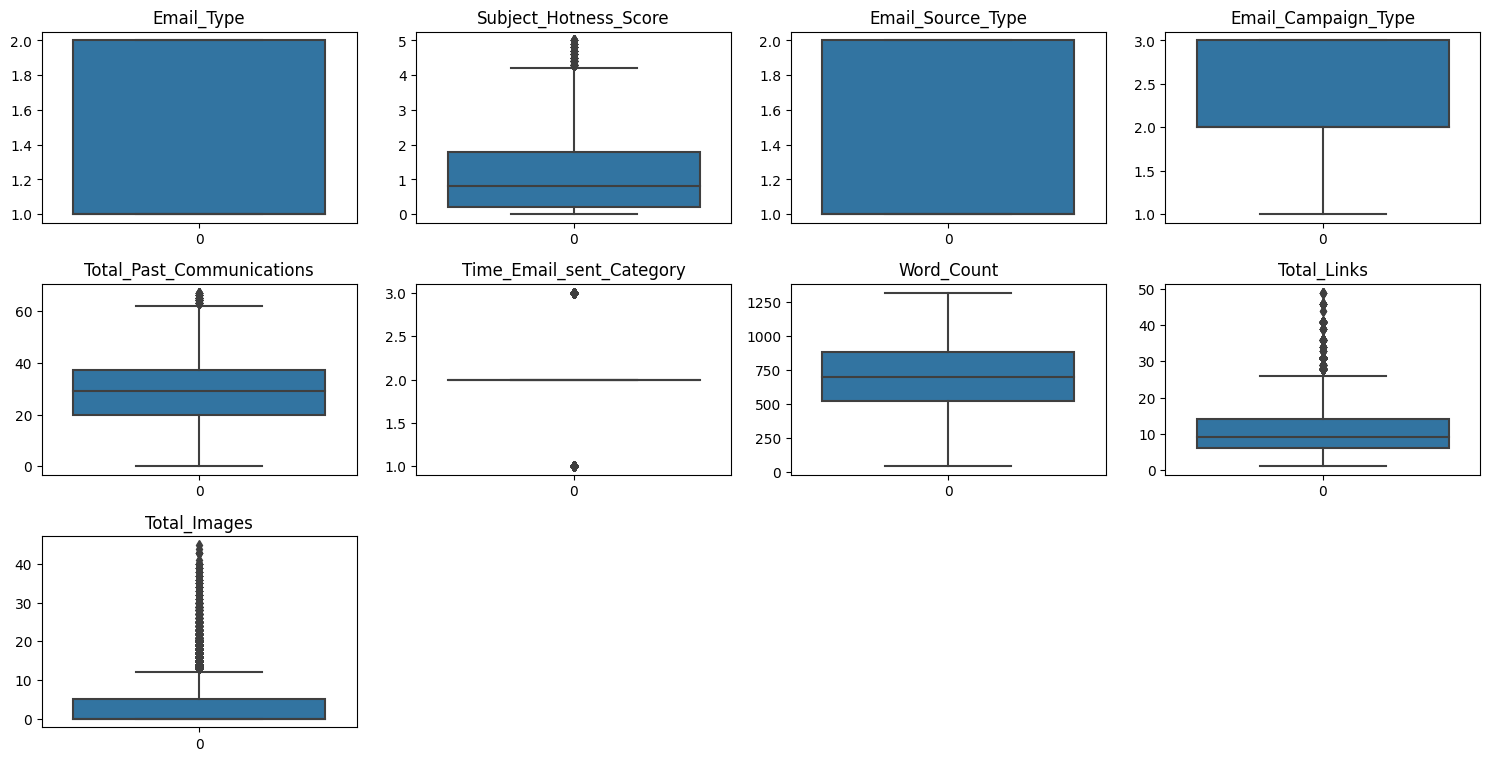

In [ ]:
# Chart - 2 visualization code
# checking Outliers with seaborn boxplot
check_outlier=['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
        'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images']
n =0
plt.figure(figsize=(15,10))
for i in check_outlier:
  if n<10:
    n=n+1
  plt.subplot(4,4,n)
  sns.boxplot(df[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()



##### 1. Why did you pick the specific chart?

To know the presence of outliers

##### 2. What is/are the insight(s) found from the chart?

Subject Hotness score,Total links,Total images,Total past communication columns have the presence of outliers.

#### Chart - 3 Correlation Heatmap

<Axes: >

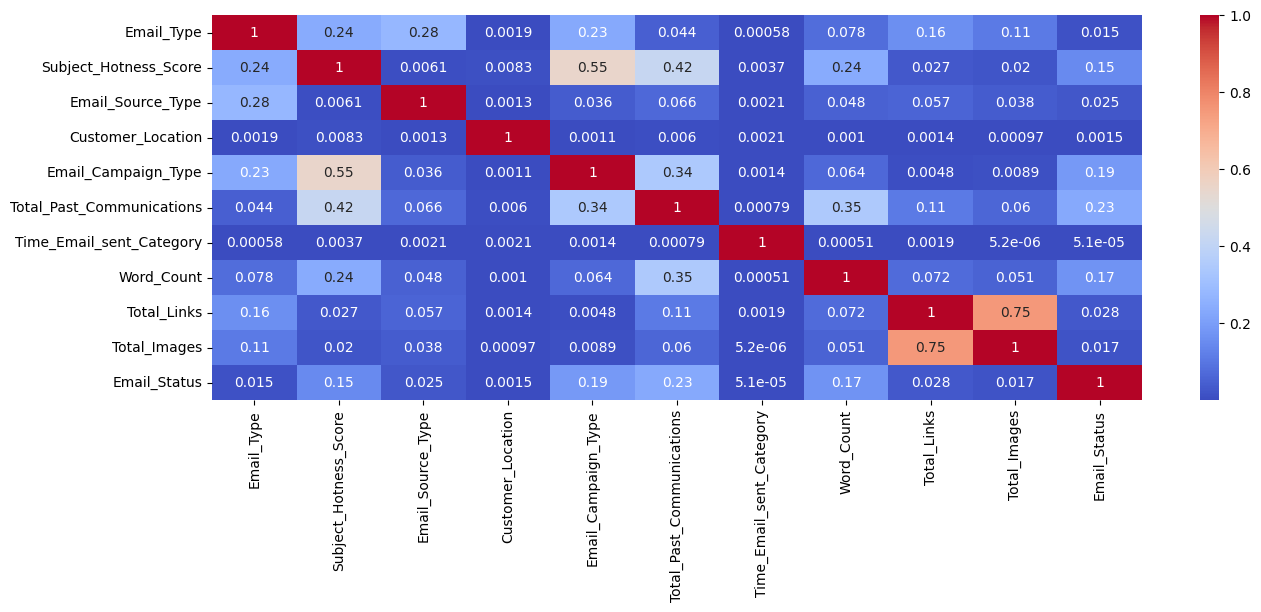

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Email_Status','Email_Campaign_Type']]])

,variables,VIF
0,Email_Type,7.716794
1,Subject_Hotness_Score,2.383219
2,Email_Source_Type,8.352626
3,Customer_Location,6.945613
4,Total_Past_Communications,7.126561
5,Time_Email_sent_Category,9.859724
6,Word_Count,7.828110
7,Total_Links,8.715754
8,Total_Images,3.183622


##### 1. Why did you pick the specific chart?

To know the collinearity between the features.

##### 2. What is/are the insight(s) found from the chart?

Dependent variable is not collinear with id features.Total links and total images are correlated.But i am not avoiding or merging them as we have less number of columns

#### Chart - 4 - Pair Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


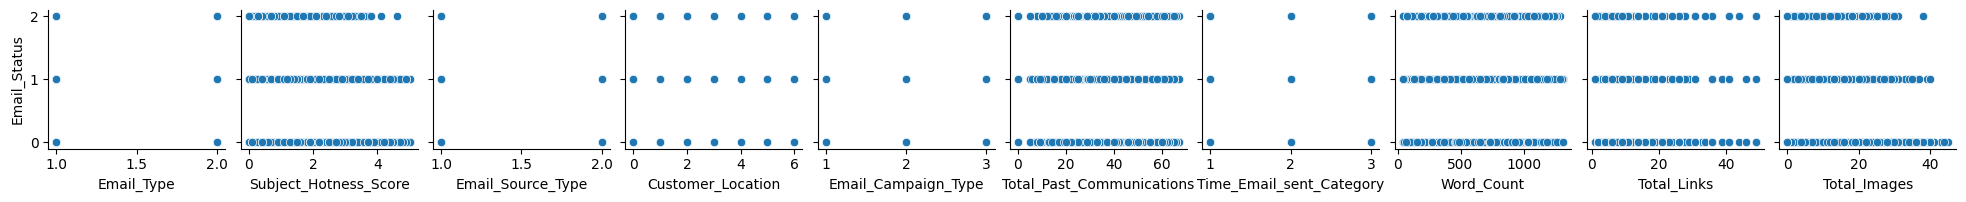

In [ ]:
# Pair Plot visualization code
v=df[['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images']]
g = sns.pairplot(data=df,size=2,x_vars=v,y_vars='Email_Status')
plt.show()

##### 1. Why did you pick the specific chart?

A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and can be easily implemented in Python!


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Test whether there is a significant difference in the mean Total_Links between customers located in the United States and customers located in Europe using a two-sample t-test:

#### 2. Perform an appropriate statistical test.

<b>H0:There is no significant difference in the mean Total_Links between customers located in the United States and customers located in Europe.

<b>H1:There is significant difference in the mean Total_Links between customers located in the United States and customers located in Europe.

In [ ]:
from scipy.stats import ttest_ind
us_links = df.loc[df['Customer_Location'] == '6', 'Total_Links']
europe_links = df.loc[df['Customer_Location'] == '4', 'Total_Links']

t, p = ttest_ind(us_links, europe_links)

if p < 0.05:
    print("Reject null hypothesis: There is a significant difference in the mean Total_Links between customers located in the G and customers located in E.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the mean Total_Links between customers located in the G and customers located in E.")


Fail to reject null hypothesis: There is no significant difference in the mean Total_Links between customers located in the G and customers located in E.


##### Which statistical test have you done to obtain P-Value?

Independent student t test

##### Why did you choose the specific statistical test?

It is used because columns are normally distributed and to check means varies with some condition.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Test whether there is a significant difference in the mean Word_Count between promotional and informational email campaign types using a two-sample t-test:

<b>H0:There is no significant difference in the mean Word_Count between promotional and informational email campaign types.

<b>H1:There is a significant difference in the mean Word_Count between promotional and informational email campaign types.

In [ ]:
df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,4,2,33.0,1,440,8.0,0.0,0
1,2,2.1,1,6,2,15.0,2,504,5.0,0.0,0
2,2,0.1,1,1,3,36.0,2,962,5.0,0.0,1
3,1,3.0,2,4,2,25.0,2,610,16.0,0.0,0
4,1,0.0,2,2,3,18.0,2,947,4.0,0.0,0


In [ ]:

# Perform Statistical Test to obtain P-Value
promotional_wc = df.loc[df['Email_Campaign_Type'] == 1, 'Word_Count']
informational_wc = df.loc[df['Email_Campaign_Type'] == 2, 'Word_Count']

t, p = ttest_ind(promotional_wc, informational_wc)

if p < 0.05:
    print("Reject null hypothesis: There is a significant difference in the mean Word_Count between 1 and 2 email campaign types.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the mean Word_Count between 1 and 2 email campaign types.")


Reject null hypothesis: There is a significant difference in the mean Word_Count between 1 and 2 email campaign types.


##### Which statistical test have you done to obtain P-Value?

Independent student t test

##### Why did you choose the specific statistical test?

It is used because columns are normally distributed and to check means varies with some condition.

### Hypothetical Statement - 3

Test whether there is a significant association between Email_Source_Type and Email_Status using a chi-square test:

<b>
<b>

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b>H0:There is no significant association between Email_Source_Type and Email_Status.

<b>H1:There is significant association between Email_Source_Type and Email_Status.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

observed = pd.crosstab(df['Email_Source_Type'], df['Email_Status'])
chi2, p, dof, expected = chi2_contingency(observed)

if p < 0.05:
    print("Reject null hypothesis: There is a significant association between Email_Source_Type and Email_Status.")
else:
    print("Fail to reject null hypothesis: There is no significant association between Email_Source_Type and Email_Status.")


Reject null hypothesis: There is a significant association between Email_Source_Type and Email_Status.


##### Which statistical test have you done to obtain P-Value?

Chi2 test

##### Why did you choose the specific statistical test?

as column is categorical

#Hypothetical Statement - 4

Test whether there is a significant difference in the mean Subject_Hotness_Score between emails sent in the morning and emails sent in the afternoon using a two-sample t-test:

In [ ]:
morning_shs = df.loc[df['Time_Email_sent_Category'] == 1, 'Subject_Hotness_Score']
afternoon_shs = df.loc[df['Time_Email_sent_Category'] == 2, 'Subject_Hotness_Score']

t, p = ttest_ind(morning_shs, afternoon_shs)

if p < 0.05:
    print("Reject null hypothesis: There is a significant difference in the mean Subject_Hotness_Score between emails sent in the morning and emails sent in the afternoon.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the mean Subject_Hotness_Score between emails sent in the morning and emails sent in the afternoon.")


Reject null hypothesis: There is a significant difference in the mean Subject_Hotness_Score between emails sent in the morning and emails sent in the afternoon.


It is used because columns are normally distributed and to check means varies with some condition.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
#Done above

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments


In [ ]:
#Handling Outliers
outlier_col=['Subject_Hotness_Score','Total_Links','Total_Images','Total_Past_Communications']
def outlier_treat(df,i):
  upper_lim = df[i].quantile(.95)
  lower_lim = df[i].quantile(.05)
  df.loc[df[i] > upper_lim,i] = upper_lim
  df.loc[df[i] < lower_lim,i] = lower_lim
  return i
for i in outlier_col:
  outlier_treat(df,i)

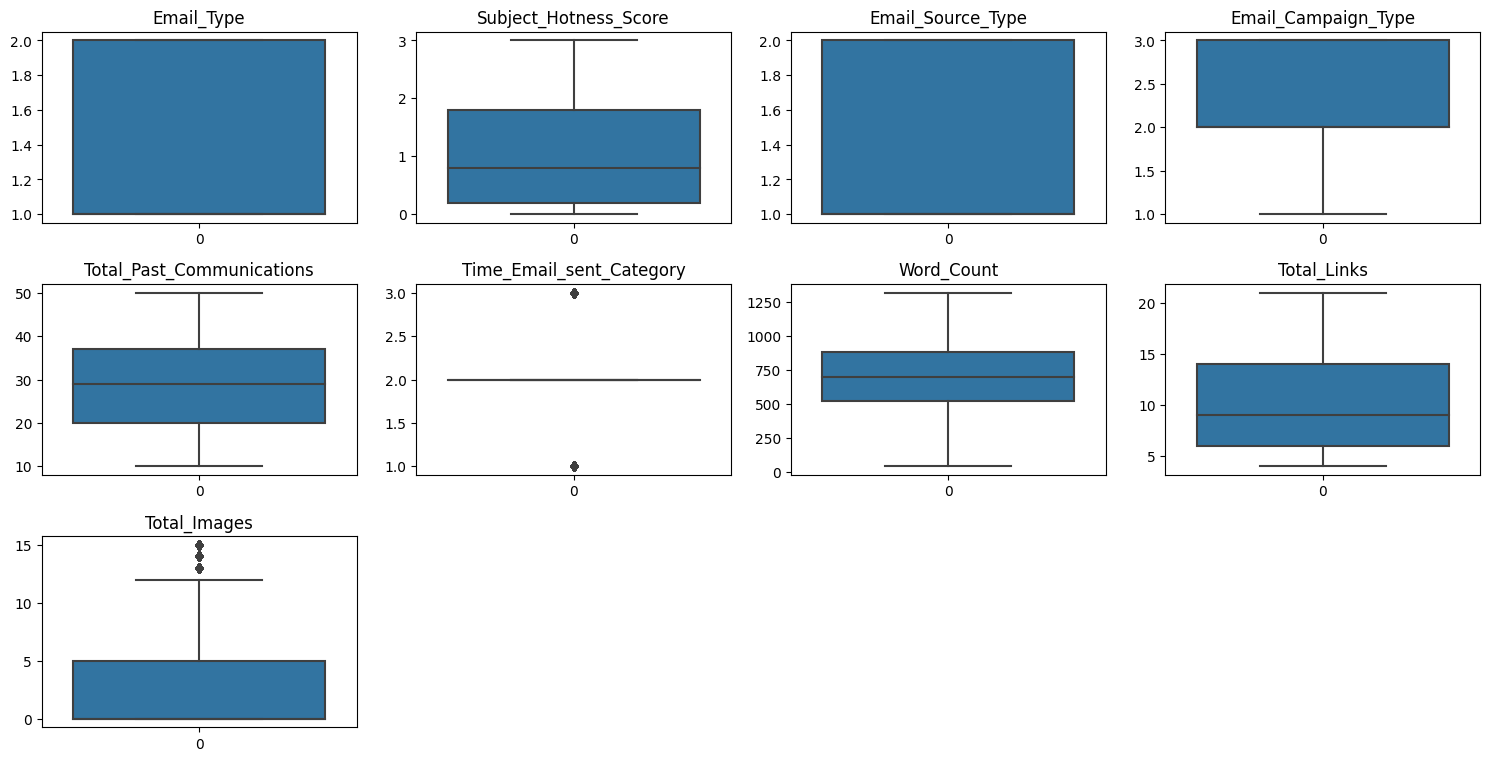

In [ ]:
# checking Outliers with seaborn boxplot
check_outlier=['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
        'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images']
n =0
plt.figure(figsize=(15,10))
for i in check_outlier:
  if n<10:
    n=n+1
  plt.subplot(4,4,n)
  sns.boxplot(df[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()

I done imputing 95% value for all values above 95% and 5% value for all values below 5% values.

#### What all categorical encoding techniques have you used & why did you use those techniques?

I done cardinal encoding

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X=df.drop(['Email_Status','Email_Campaign_Type'],axis=1)
y=df['Email_Status']

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

##### Which method have you used to scale you data and why?

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = MinMaxScaler()

#Fit on data
X[X.columns]=scaler.fit_transform(X[X.columns])
X[X.columns]=scaler.transform(X[X.columns])

X.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images
0,-1.0,0.244444,0.0,0.111111,-0.235625,-0.50,-0.031102,-0.221453,0.0
1,0.0,0.233333,-1.0,0.166667,-0.246875,-0.25,-0.031063,-0.231834,0.0
2,0.0,0.011111,-1.0,0.027778,-0.233750,-0.25,-0.030782,-0.231834,0.0
3,-1.0,0.333333,0.0,0.111111,-0.240625,-0.25,-0.030998,-0.193772,0.0
4,-1.0,0.000000,0.0,0.055556,-0.245000,-0.25,-0.030791,-0.235294,0.0


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54682, 9)
(13671, 9)
(54682,)
(13671,)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

Text(0.5, 1.0, 'Before SMOTE')

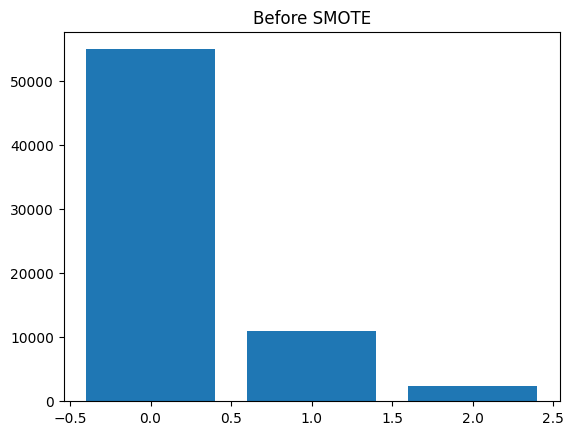

In [ ]:
from collections import Counter
plt.bar(Counter(df['Email_Status']).keys(), Counter(df['Email_Status']).values())
plt.title("Before SMOTE")

##### Do you think the dataset is imbalanced? Explain Why.

The data is imbalanced as 0 has a high number comparedd to 1 and 2.So this data needs to be balanced.

Text(0.5, 1.0, 'After SMOTE')

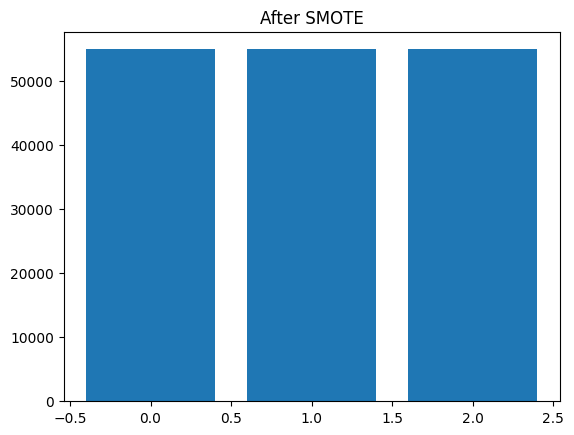

In [ ]:
# Handling Imbalanced Dataset (If needed)Doing SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['Email_Status'])
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values())
plt.title("After SMOTE")

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I selected SMOTE to balance the dataset as undersampling minimises the amount of data which result in low efficiency of model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3,stratify=y_smote)

## ***7. ML Model Implementation***

### ML Model - 1 KNN

In [ ]:
# Setup a knn classifier with k neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fit the model on the train set
classifier_knn.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
column_name=['MODEL_NAME','F1_SCORE_Train','PRECISION_Train','RECALL__Train','ACCURACY_Train','ROC_AUC_Train','F1_SCORE_Test','PRECISION_Test','RECALL__Test','ACCURACY_Test','ROC_AUC_Test']
All_model=pd.DataFrame(columns=column_name)

In [ ]:
def evaluate(model,X_train,y_train,X_test,y_test,model_name):
  '''Function for evaluating all the models'''
  global column_name
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)

  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)

  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )


  # Get the Recall for train and test
  train_recall = recall_score(y_train, train_class_preds, average='weighted')
  test_recall = recall_score(y_test, test_class_preds, average='weighted')

  # Get the precision for train and test
  train_precision = precision_score(y_train, train_class_preds, average='weighted')
  test_precision = precision_score(y_test, test_class_preds, average='weighted')

  # Get the f1 Score for train and test
  train_f1score = f1_score(y_train, train_class_preds, average='weighted')
  test_f1score = f1_score(y_test, test_class_preds, average='weighted')

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds,multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_preds,multi_class = 'ovr')

  list_score=[model_name,train_f1score,train_precision,train_recall,train_accuracy,train_auc,test_f1score,test_precision,test_recall,test_accuracy,test_auc]
  res = {column_name[i]: list_score[i] for i in range(len(column_name))}


  print("----- Evaluation on train data -----\n")
  print("Confusion matrix \n")
  print(train_cm)
  print("\n Accuracy = ",train_accuracy)
  print("\n Recall = ",train_recall)
  print("\n Precision = ",train_precision)
  print("\n F1 score = ",train_f1score)
  print("\n Roc_Auc score = ",train_auc)

  print("\n\n----- Evaluation on test data -----\n")
  print("Confusion matrix \n")
  print(test_cm)
  print("\n Accuracy = ",test_accuracy)
  print("\n Recall = ",test_recall)
  print("\n Precision = ",test_precision)
  print("\n F1 score = ",test_f1score)
  print("\n Roc_Auc score = ",test_auc)

  fpr = {}
  tpr = {}
  thresh ={}
  n_class=3
  for i in range(n_class):
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend()
  return res

----- Evaluation on train data -----

Confusion matrix 

[[30916  9073  3964]
 [ 1326 41230  1397]
 [  288   720 42944]]

 Accuracy =  0.8728328959941756

 Recall =  0.8728328959941756

 Precision =  0.8824895874625277

 F1 score =  0.8692078713657858

 Roc_Auc score =  0.981334833786951


----- Evaluation on test data -----

Confusion matrix 

[[ 6617  3102  1269]
 [  742  9645   601]
 [  150   336 10503]]

 Accuracy =  0.8119217351736691

 Recall =  0.8119217351736691

 Precision =  0.8224307730156933

 F1 score =  0.8053358780162522

 Roc_Auc score =  0.9309551987313321


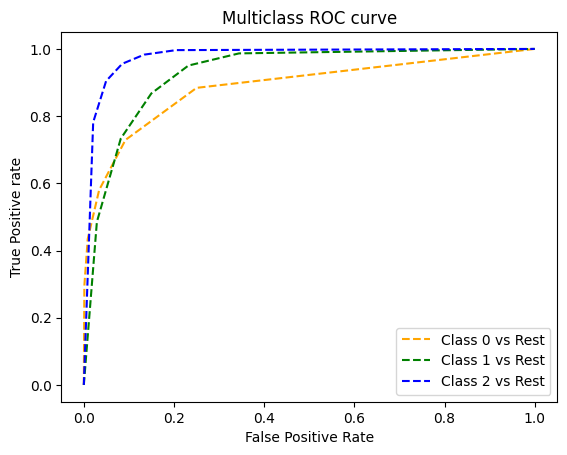

In [ ]:
final_list=[]
res=evaluate(classifier_knn,X_train,y_train,X_test,y_test,'KNN')
final_list.append(res)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_neighbors':np.arange(1,5)}

# Fit the Algorithm
# Performing RandomSearch
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)


# Predict on the model

print("Best score is: ",knn_cv.best_score_)

print("Best Parameters are: ",knn_cv.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best score is:  0.8495350803006646
Best Parameters are:  {'n_neighbors': 1}


----- Evaluation on train data -----

Confusion matrix 

[[43931    17     5]
 [   12 43932     9]
 [    1     1 43950]]

 Accuracy =  0.9996587237786103

 Recall =  0.9996587237786103

 Precision =  0.9996587232489488

 F1 score =  0.9996587134233423

 Roc_Auc score =  0.9997440439339336


----- Evaluation on test data -----

Confusion matrix 

[[ 7712  2390   886]
 [  610 10081   297]
 [  144   157 10688]]

 Accuracy =  0.8639769452449567

 Recall =  0.8639769452449567

 Precision =  0.8698637919609624

 F1 score =  0.8605592603445615

 Roc_Auc score =  0.8979811687336124


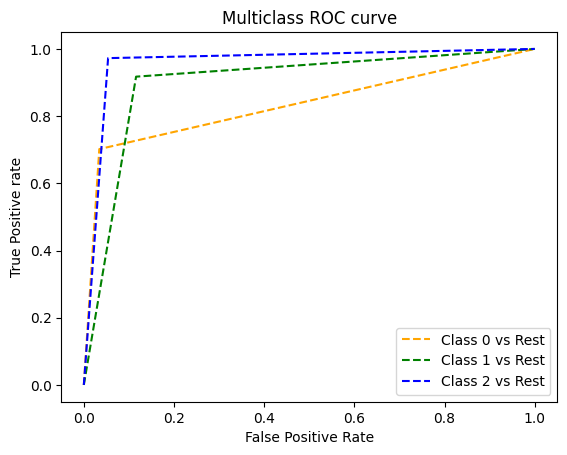

In [ ]:

# Evaluate results
res=evaluate(knn_cv,X_train,y_train,X_test,y_test,'Hyper_Tuned_KNN')
final_list.append(res)

##### Which hyperparameter optimization technique have you used and why?

RandomSearch CV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 DECISION TREE

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart


# Initializing the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier_smote = DecisionTreeClassifier()
# Fit the decision tree model
dt_classifier_smote.fit(X_train,y_train)

DecisionTreeClassifier()

----- Evaluation on train data -----

Confusion matrix 

[[43949     4     0]
 [   22 43929     2]
 [    6     6 43940]]

 Accuracy =  0.9996966433587647

 Recall =  0.9996966433587647

 Precision =  0.9996967316304967

 F1 score =  0.9996966499023767

 Roc_Auc score =  0.999999893193492


----- Evaluation on test data -----

Confusion matrix 

[[8343 2097  548]
 [1814 7719 1455]
 [ 448 1170 9371]]

 Accuracy =  0.7715152434400121

 Recall =  0.7715152434400121

 Precision =  0.771075772151141

 F1 score =  0.7711316159141992

 Roc_Auc score =  0.8286983088258705


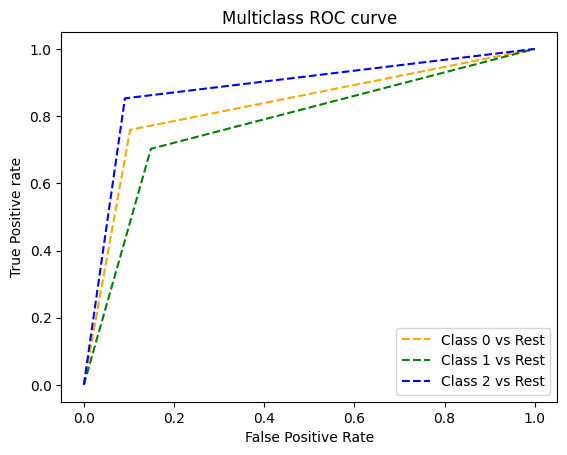

In [ ]:

# Evaluate the results
res=evaluate(dt_classifier_smote,X_train,y_train,X_test,y_test,'Decision_Tree')
final_list.append(res)

 Decision Tree was overfitted because of the depth of the tree

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
dt_classifier_smote.tree_.max_depth

40

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques


# Fit the Algorithm
for max_d in range(1,21):
  dt_classifier_smote = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  dt_classifier_smote.fit(X_train, y_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), dt_classifier_smote.score(X_train, y_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), dt_classifier_smote.score(X_test,y_test))
  print('')

# Predict on the model

The Training Accuracy for max_depth 1 is: 0.464803045700678
The Validation Accuracy for max_depth 1 is: 0.4641892916729865

The Training Accuracy for max_depth 2 is: 0.5075687481988199
The Validation Accuracy for max_depth 2 is: 0.5095707568633399

The Training Accuracy for max_depth 3 is: 0.5219099334132172
The Validation Accuracy for max_depth 3 is: 0.5219171848930684

The Training Accuracy for max_depth 4 is: 0.5387917304979599
The Validation Accuracy for max_depth 4 is: 0.5385105414833915

The Training Accuracy for max_depth 5 is: 0.5656691289114046
The Validation Accuracy for max_depth 5 is: 0.5650538449871075

The Training Accuracy for max_depth 6 is: 0.5788044714768918
The Validation Accuracy for max_depth 6 is: 0.5783406643409676

The Training Accuracy for max_depth 7 is: 0.5966418419815256
The Validation Accuracy for max_depth 7 is: 0.5931442438950402

The Training Accuracy for max_depth 8 is: 0.6080556356080026
The Validation Accuracy for max_depth 8 is: 0.6037312300925224

T

##### Which hyperparameter optimization technique have you used and why?

Maximum depth was used as it has 40 nodes.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The optimum brach was found to be 8 where both values mount inordinately.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 XGBOOST

In [ ]:
# ML Model - 3 Implementation

from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
#Fit the model
xgb_model.fit(X_train,y_train)


[07:01:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, min_samples_leaf=20, min_samples_split=30,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

----- Evaluation on train data -----

Confusion matrix 

[[43775   161    17]
 [ 1494 41982   477]
 [  214   136 43602]]

 Accuracy =  0.9810477938388266

 Recall =  0.9810477938388266

 Precision =  0.9814065818188706

 F1 score =  0.9810084197269046

 Roc_Auc score =  0.9993944926734034


----- Evaluation on test data -----

Confusion matrix 

[[10363   570    55]
 [ 1402  8705   881]
 [  321   355 10313]]

 Accuracy =  0.891278628848779

 Recall =  0.891278628848779

 Precision =  0.8927263848408381

 F1 score =  0.8900543728559416

 Roc_Auc score =  0.9686479478042451


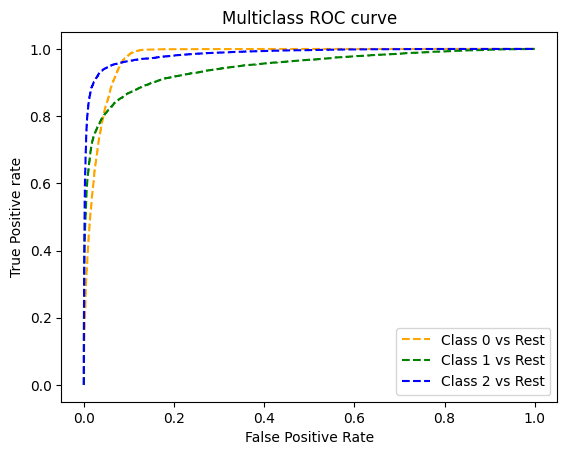

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluate the results
res=evaluate(xgb_model,X_train,y_train,X_test,y_test,'XGBoost')
final_list.append(res)

We have Good F1 score for both training and testing data using XGBoost mod

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# fitting the model for grid search




# Predict on the model

# NAIVE-BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Instantiating all the models.
gausian = GaussianNB()
bernoulli = BernoulliNB()
multinomial = MultinomialNB()

In [ ]:
# Fit the model
gausian.fit(X_train,y_train)

GaussianNB()

----- Evaluation on train data -----

Confusion matrix 

[[30511  5602  7840]
 [11402 11243 21308]
 [ 6340  6999 30613]]

 Accuracy =  0.5488252514068164

 Recall =  0.5488252514068164

 Precision =  0.5386980034709605

 F1 score =  0.5279355250671579

 Roc_Auc score =  0.7350064149023439


----- Evaluation on test data -----

Confusion matrix 

[[7617 1426 1945]
 [2815 2866 5307]
 [1618 1729 7642]]

 Accuracy =  0.5498255725769756

 Recall =  0.5498255725769756

 Precision =  0.5404022939913609

 F1 score =  0.529587446749583

 Roc_Auc score =  0.7363768894077886


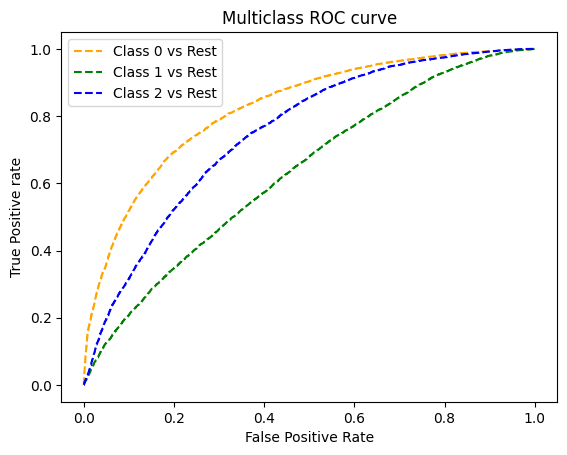

In [ ]:
# Evaluate results
res=evaluate(gausian,X_train,y_train,X_test,y_test,'Gaussian')
final_list.append(res)

Naive bayes give results worse than the baseline models. Hence we reject this model

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

----- Evaluation on train data -----

Confusion matrix 

[[43828   109    16]
 [  590 43308    55]
 [   75   115 43762]]

 Accuracy =  0.9927194406103536

 Recall =  0.9927194406103536

 Precision =  0.9927627589054389

 F1 score =  0.9927205312764019

 Roc_Auc score =  0.9998332526249786


----- Evaluation on test data -----

Confusion matrix 

[[9554 1202  232]
 [1816 8119 1053]
 [ 375  860 9754]]

 Accuracy =  0.8320036402244805

 Recall =  0.8320036402244805

 Precision =  0.8315058899259485

 F1 score =  0.8310701132600905

 Roc_Auc score =  0.9419225683661038


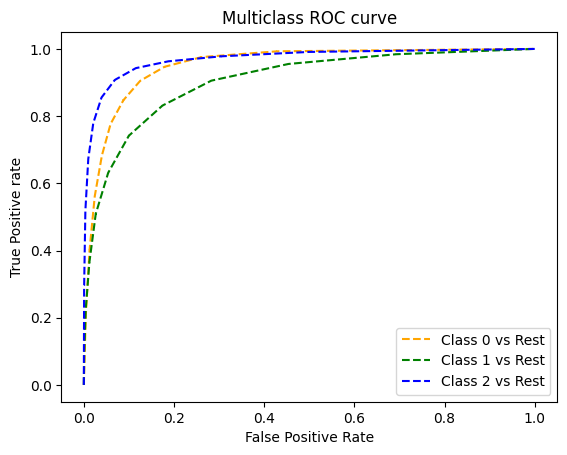

In [ ]:
# Evaluate results
res=evaluate(classifier_rf,X_train,y_train,X_test,y_test,'Random_Forest')
final_list.append(res)

Random Forest Hyperparameter max_depth

In [ ]:
# Number of trees
n_estimators = [50,100]
max_depth = [4,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()
#Random search
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   6.9s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   5.4s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   6.7s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   5.3s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=50; total time=   7.5s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=  12.3s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=  12.1s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=  12.3s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=  12.2s
[CV] END max_depth=8, min_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [4, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100],
                                        'n_estimators': [50, 100]},
                   verbose=2)

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
rf_optimal_model = rf_random.best_estimator_

----- Evaluation on train data -----

Confusion matrix 

[[34354  5320  4279]
 [11084 15159 17710]
 [ 4447  6568 32937]]

 Accuracy =  0.6252938767461966

 Recall =  0.6252938767461966

 Precision =  0.6162648269648245

 F1 score =  0.6084752486022105

 Roc_Auc score =  0.80678440580887


----- Evaluation on test data -----

Confusion matrix 

[[8482 1429 1077]
 [2682 3796 4510]
 [1131 1646 8212]]

 Accuracy =  0.6215683300470196

 Recall =  0.6215683300470196

 Precision =  0.6124849432163461

 F1 score =  0.605430641041505

 Roc_Auc score =  0.8034471913335622


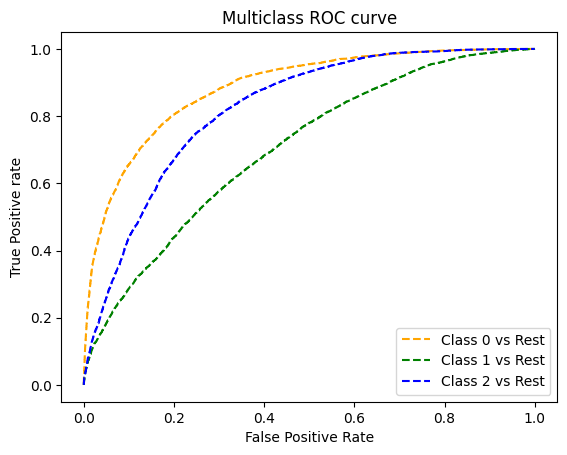

In [ ]:

# Evaluate results
res=evaluate(rf_optimal_model,X_train,y_train,X_test,y_test,'Hyper_Tuned_Random_Forest')

##### Which hyperparameter optimization technique have you used and why?

Maximum depth

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

# SVM was implemented but it keeps on running endlessly.This may be due the surplus of training data.So we have avoided modelling using SVM.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We can observe that XG-Boost outperformed all the other models both for train as well as test.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
## Weights for XGB using ELI5
eli.explain_weights(xgb_model)

Weight,Feature
0.2756,Email_Campaign_Type
0.1292,Email_Type
0.1167,Email_Source_Type
0.1032,Subject_Hotness_Score
0.0933,Total_Past_Communications
0.0744,Total_Links
0.0572,Time_Email_sent_Category
0.0554,Total_Images
0.0544,Word_Count
0.0406,Customer_Location


Email type is the most important feature.

# **Conclusion**

In EDA, If your Email_Campaign_Type was 1, there is a 90% likelihood of your Email to be read/acknowledged.

It was observed that both Time_Email_Sent and Customer_Location were insignificant in determining the Email_status. The ratio of the Email_Status was same irrespective of the demographic or the time frame the emails were sent on.

As the word_count increases beyond the 600 mark we see that there is a high possibility of that email being ignored. The ideal mark is 400-600. No one is interested in reading long mails !

For modelling, it was observed that for imbalance handling Oversampling i.e. SMOTE worked .

Based on the metrics, XG Boost Classifier worked the best giving a train score of 95% and test score of 81% for F1 score.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***